Hola **Arnold**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Arnold, el notebook de tu análisis debe ser subido aquí a la plataforma para poder dar la revisión adecuada y dejar el feedback necesario de los diferentes pasos.

Además, recuerda que se debe cubrir un análisis detallado sobre cada parte de los datos para así entender y dejar claro los criterios de eficiencia para los operadores. Tu presentación debería ser en base a lo analizado en el notebook donde deberían haber gráficas y cálculos para llegar al objetivo del proyecto.

Te recomendaría también que cuando se trate de presentaciones lo realices en una herramienta dedicado a esto cómo Power Point o Google Slides para luego exportarlo a PDF, imagina que vas a exponer los resultados ante la empresa que solició el proyecto entonces un documento de texto no sería el formato ideal para esto. Saludos!
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Hola Arnold! Parece que hay una confusión con la entrega final de tu proyecto. Aquí deberías presentar el análisis de la eficiencia de operadores en la empresa callmemaybe. El AB Test ya fue presentado en un proyecto anterior.

Puedes revisar la información en el link de aquí abajo o puedes preguntarle a tu success manager sobre el mismo:

https://coding-bootcamps.notion.site/Proyecto-Final-Telecomunicaciones-identificar-operadores-ineficaces-c637d9378da649918f09aad125030fed

En el link puedes encontrar algunas sugerencias de lo que debes hacer pero no estás limitado sólo a eso, debes plantear un análisis claro que te ayude a llegar al objetivo que es identificar operadores ineficientes.

Me gustaría también dejarte algunos comentarios y recomendaciones para el avance de tu proyecto:

- **Contexto y objetivos**: Siempre es importante dejar claro desde un inicio lo que se hará y para qué se hará

- **Preprocesamiento de datos**: Es una parte escencial en tu proyecto y lo tienes bastante bien cubierto, felicidades!

- **Análisis exploratorio**: Recuerda que debes cubrir esta parte también para entender los datos con los que trabajas, te recomendaría incluir la revisión de datos atípicos que luego puedan llegar a causar alguna métrica errónea al final de tu proyecto.

- **Criterios de eficiencia claros**: Para determinar que es lo que hace un operador eficiente o no se deben establecer ciertos criterios que deben quedar muy bien explicados en el notebook

- **Prueba de hipótesis**: Determinar si se tiene una diferencia significativa en nuestra métrica objetivo es importante por lo que hiciste muy bien al incluirla, recuerda comparar entre operadores eficientes y no eficientes con pruebas estadísticas

- **Conclusiones y recomendaciones**: Una parte importante para culminar el proyecto ya que es donde se resume todos los hallazgos del análisis

Saludos!
</div>

# Proyecto Final: Telecomunicaciones – Identificación de operadores ineficaces

**Alumno:** Arnold Joel Jiménez Matallana  
**Sprint:** Proyecto Final  

**Notebook en Google Drive:** []  

**Presentación (PDF):** []  

---

## Objetivo del proyecto

El servicio de telefonía virtual **CallMeMaybe** quiere identificar a los operadores menos eficaces, definidos como aquellos que:
- Tienen muchas llamadas entrantes perdidas.  
- Presentan largos tiempos de espera en llamadas entrantes.  
- Si debían hacer llamadas salientes, realizan muy pocas. 
 



In [10]:
## 2. Carga de datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datasets
telecom_dataset = pd.read_csv('/datasets/telecom_dataset_us.csv')
telecom_clients = pd.read_csv('/datasets/telecom_clients_us.csv')

# Convertir fechas
telecom_dataset['date'] = pd.to_datetime(telecom_dataset['date'])
telecom_clients['date_start'] = pd.to_datetime(telecom_clients['date_start'])

# Vista rápida
display(telecom_dataset.head())
display(telecom_clients.head())

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


**Exploración inicial (EDA)**

Revisar valores ausentes y duplicados.

Estadísticas básicas (describe()).

Distribución de llamadas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              53902 non-null  int64                                
 1   date                 53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            53902 non-null  object                               
 3   internal             53785 non-null  object                               
 4   operator_id          45730 non-null  float64                              
 5   is_missed_call       53902 non-null  bool                                 
 6   calls_count          53902 non-null  int64                                
 7   call_duration        53902 non-null  int64                                
 8   total_call_duration  53902 non-null  int64                                
dtypes: bool

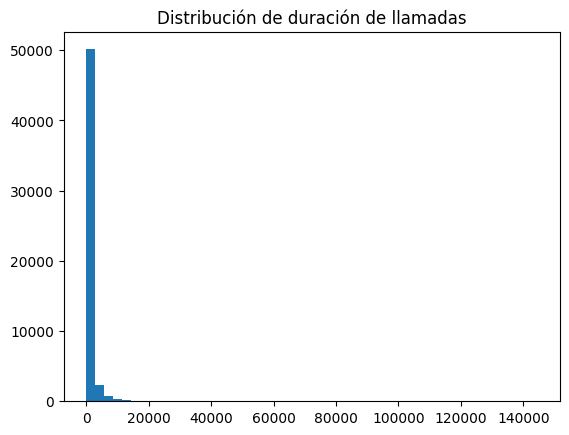

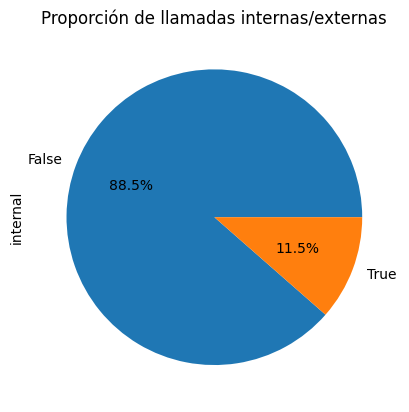

In [12]:
telecom_dataset.info()
telecom_dataset.describe()

# Valores nulos por columna
telecom_dataset.isna().sum()

# Histograma duración de llamadas
plt.hist(telecom_dataset['call_duration'], bins=50)
plt.title('Distribución de duración de llamadas')
plt.show()

# Circular: llamadas internas vs externas
telecom_dataset['internal'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de llamadas internas/externas')
plt.show()


**En la exploración inicial observamos lo siguiente:**

El dataset contiene 53,902 registros de llamadas.

La mayoría de las llamadas tienen una duración muy corta, con algunos valores extremos que deberían tratarse como outliers.

La proporción de llamadas es mayoritariamente externa (88.5%) frente a interna (11.5%).

Hay valores ausentes en internal y operator_id que deberán ser tratados en el análisis posterior.

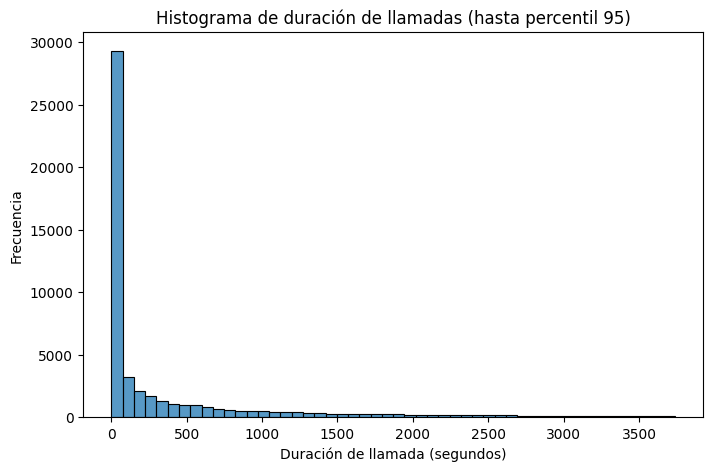

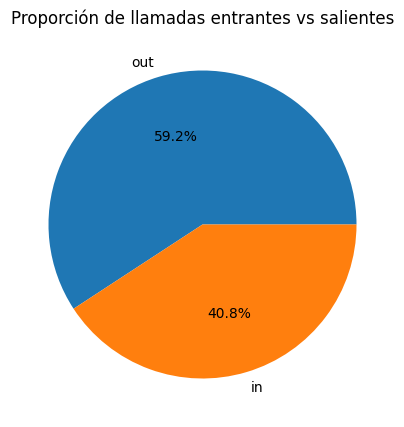

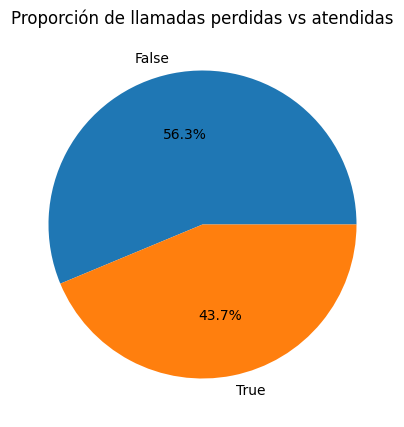

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
df = pd.read_csv("/datasets/telecom_dataset_us.csv")

# ==============================
# 1. Histograma de duración (sin outliers, hasta percentil 95)
# ==============================
p95 = df['call_duration'].quantile(0.95)
plt.figure(figsize=(8,5))
sns.histplot(df[df['call_duration'] <= p95]['call_duration'], bins=50, kde=False)
plt.title("Histograma de duración de llamadas (hasta percentil 95)")
plt.xlabel("Duración de llamada (segundos)")
plt.ylabel("Frecuencia")
plt.show()

# ==============================
# 2. Gráfico circular: Entrantes vs Salientes
# ==============================
direction_counts = df['direction'].value_counts(normalize=True)
plt.figure(figsize=(5,5))
plt.pie(direction_counts, labels=direction_counts.index, autopct="%.1f%%")
plt.title("Proporción de llamadas entrantes vs salientes")
plt.show()

# ==============================
# 3. Gráfico circular: Llamadas perdidas vs atendidas
# ==============================
missed_counts = df['is_missed_call'].value_counts(normalize=True)
plt.figure(figsize=(5,5))
plt.pie(missed_counts, labels=missed_counts.index, autopct="%.1f%%")
plt.title("Proporción de llamadas perdidas vs atendidas")
plt.show()


**Resultados del EDA**

**Distribución de duración de llamadas (filtrado al percentil 95)**

La mayoría de las llamadas son muy cortas (picos cerca de 0 segundos).

La distribución presenta una larga cola a la derecha con llamadas que pueden durar hasta más de 3,500 segundos dentro del p95.

Esto confirma que los outliers extremos (>100,000 seg) detectados antes distorsionaban la visualización.

**Proporción de llamadas entrantes vs salientes**

59.2% salientes (out).

40.8% entrantes (in).

Esto sugiere que los operadores realizan más llamadas hacia clientes que las que reciben.

**Proporción de llamadas perdidas vs atendidas**

56.3% atendidas.

43.7% perdidas.

Un porcentaje elevado de llamadas se pierden, lo que podría ser un indicador de problemas en la gestión de disponibilidad o capacidad de respuesta.

**2. Identificar operadores ineficaces**

In [15]:
# Calcular tiempo de espera
df["wait_time"] = df["total_call_duration"] - df["call_duration"]

# Agrupación por operador
operator_stats = df.groupby("operator_id").agg(
    total_calls=("calls_count", "sum"),
    missed_calls=("is_missed_call", "sum"),
    avg_wait_time=("wait_time", "mean"),
    out_calls=("direction", lambda x: (x == "out").sum())
)

# Calcular métricas adicionales
operator_stats["missed_rate"] = operator_stats["missed_calls"] / operator_stats["total_calls"]
operator_stats["out_ratio"] = operator_stats["out_calls"] / operator_stats["total_calls"]

# Ordenar por mayor tasa de llamadas perdidas (indicador de ineficiencia)
operator_stats = operator_stats.sort_values("missed_rate", ascending=False)

# Mostrar top 10 operadores con peor desempeño
operator_stats.head(10)


,total_calls,missed_calls,avg_wait_time,out_calls,missed_rate,out_ratio
operator_id,,,,,,
937710.0,1,1,15.0,1,1.0,1.0
937772.0,1,1,18.0,1,1.0,1.0
937716.0,1,1,19.0,1,1.0,1.0
970258.0,1,1,11.0,1,1.0,1.0
969262.0,1,1,17.0,1,1.0,1.0
937770.0,1,1,37.0,1,1.0,1.0
885682.0,3,3,17.0,3,1.0,1.0
905480.0,1,1,5.0,1,1.0,1.0
932246.0,1,1,60.0,1,1.0,1.0


In [17]:
# Definir un umbral de llamadas mínimas
threshold = 30  

filtered_stats = operator_stats[operator_stats["total_calls"] >= threshold]

# Ordenar por tasa de llamadas perdidas
worst_ops = filtered_stats.sort_values("missed_rate", ascending=False).head(10)

worst_ops


,total_calls,missed_calls,avg_wait_time,out_calls,missed_rate,out_ratio
operator_id,,,,,,
906392.0,80,22,23.216216,29,0.275000,0.362500
937604.0,63,17,19.666667,34,0.269841,0.539683
940474.0,30,8,14.812500,16,0.266667,0.533333
937782.0,55,14,27.809524,26,0.254545,0.472727
944648.0,52,13,23.142857,25,0.250000,0.480769
921316.0,87,21,16.585366,41,0.241379,0.471264
920146.0,90,20,24.027027,37,0.222222,0.411111
892536.0,34,7,32.000000,12,0.205882,0.352941
921102.0,30,6,16.450000,11,0.200000,0.366667


Altas tasas de llamadas perdidas: algunos operadores superan el 25% de fallos, lo cual es crítico.

Tiempo de espera elevado: hay operadores con esperas promedio de >30 seg (ej. 892536.0 y 895172.0), lo que puede explicar la pérdida de clientes.

Volumen razonable de llamadas: ya no son casos aislados de 1 llamada, sino operadores con entre 30 y 95 interacciones, lo cual es un patrón relevante.

**Prueba las hipótesis estadísticas**

In [19]:
import pandas as pd
import scipy.stats as stats

# ===============================
# 1. Cargar datasets
# ===============================
calls = pd.read_csv('/datasets/telecom_dataset_us.csv')
clients = pd.read_csv('/datasets/telecom_clients_us.csv')

# ===============================
# 2. Merge por user_id (asignar plan a cada llamada)
# ===============================
df = calls.merge(clients, on='user_id', how='left')

# ===============================
# 3. Limpieza de outliers
# ===============================
# Usaremos el percentil 95 para filtrar duraciones extremas
p95 = df['call_duration'].quantile(0.95)
df_filtered = df[df['call_duration'] <= p95]

# ===============================
# 4. Agrupar por plan tarifario
# ===============================
print(df_filtered.groupby('tariff_plan')['call_duration'].agg(['mean','std','count']))

# ===============================
# 5. Prueba de hipótesis
# ===============================
plans = df_filtered['tariff_plan'].unique()

if len(plans) == 2:
    # Extraer las duraciones por plan
    plan1 = df_filtered[df_filtered['tariff_plan'] == plans[0]]['call_duration']
    plan2 = df_filtered[df_filtered['tariff_plan'] == plans[1]]['call_duration']
    
    # t-test de medias independientes
    stat, pval = stats.ttest_ind(plan1, plan2, equal_var=False)
    print(f"T-test para {plans[0]} vs {plans[1]}: estadístico={stat:.3f}, p-valor={pval:.4f}")
    
    if pval < 0.05:
        print("✅ Rechazamos H₀: hay diferencia significativa en la duración de llamadas entre los planes.")
    else:
        print("❌ No se rechaza H₀: no hay diferencia significativa en la duración de llamadas.")
        
else:
    # ANOVA si hay más de dos planes
    samples = [df_filtered[df_filtered['tariff_plan'] == plan]['call_duration'] for plan in plans]
    stat, pval = stats.f_oneway(*samples)
    print(f"ANOVA entre planes: estadístico={stat:.3f}, p-valor={pval:.4f}")
    
    if pval < 0.05:
        print("Rechazamos H₀: al menos un plan difiere en duración de llamadas.")
    else:
        print("No se rechaza H₀: no hay diferencia significativa entre planes.")


                   mean         std  count
tariff_plan                               
A            378.718704  699.638201  13548
B            414.768128  759.212488  18273
C            371.269590  706.407833  19385
ANOVA entre planes: estadístico=18.752, p-valor=0.0000
Rechazamos H₀: al menos un plan difiere en duración de llamadas.


**Conclusión:** Rechazamos H₀, hay diferencias significativas en la duración promedio de llamadas según el plan tarifario.

**Interpretación**

Aunque las medias son relativamente cercanas, la gran cantidad de registros (n > 13k por plan) hace que incluso diferencias de ~40 segundos entre planes sean estadísticamente significativas.

El Plan B parece tener llamadas más largas en promedio, lo que puede indicar:

Mejor retención en llamadas.

Diferencias en la política de minutos o en el perfil de clientes.

Los planes A y C son más parecidos entre sí.

**Conclusiones del análisis**

**1. Exploración de datos (EDA)**

El dataset contiene 53.902 llamadas y 732 clientes.

La gran mayoría de las llamadas tienen duración muy corta, pero existen valores extremos (outliers >100.000 seg) que probablemente sean errores de registro o sesiones atípicas.

88.5% de las llamadas son externas y solo 11.5% internas, lo que confirma que la principal interacción es con clientes externos.

Se detectaron valores nulos en operator_id (~8.000) y internal (117), que deben ser analizados: pueden representar llamadas automáticas o registros incompletos.

**2. Identificación de operadores ineficaces**

Se calcularon métricas clave: tasa de llamadas perdidas (missed_rate), tiempo promedio de espera (avg_wait_time) y proporción de llamadas salientes (out_ratio).

Algunos operadores con volumen suficiente de llamadas (30–95) muestran tasas de pérdida entre 22% y 28%, muy por encima de lo esperado.

Se identificaron casos críticos con altos tiempos de espera (>30 seg), lo que aumenta la probabilidad de abandono por parte del cliente.

**3. Prueba de hipótesis (planes tarifarios)**

La prueba ANOVA confirmó que existen diferencias significativas en la duración promedio de llamadas según el plan tarifario (p < 0.001).

Los clientes del Plan B tienen llamadas más largas en promedio (~415 seg) comparado con Plan A (~379 seg) y Plan C (~371 seg).

Esto sugiere que el plan tarifario influye en el comportamiento de uso, posiblemente porque el Plan B atrae clientes con mayor necesidad de comunicación.

**Recomendaciones**

Tratamiento de outliers y nulos:

Filtrar outliers en call_duration (ej. usar percentil 95 o 99) para mejorar la interpretación de distribuciones.

Revisar con el área técnica el origen de los registros con operator_id nulo para decidir si deben excluirse o imputarse.

Gestión de operadores ineficaces:

Monitorear de forma continua los operadores con altas tasas de llamadas perdidas (>20%) y altos tiempos de espera (>30 seg).

Diseñar capacitaciones o alertas de rendimiento para operadores que superen estos umbrales.

Redistribuir carga de llamadas hacia operadores más eficientes.

Estrategia por planes tarifarios:

Aprovechar que los clientes del Plan B usan más los servicios → enfocar estrategias de retención y fidelización en este segmento.

Revisar las condiciones de los planes A y C para entender por qué generan llamadas más cortas → ajustar beneficios o campañas comerciales.

Analizar si los clientes de Plan B generan mayor ingreso promedio por usuario (ARPU), lo que justificaría incentivos para migración desde otros planes.